## The Imports

In [81]:
# Unclutter the display.
import geopandas as gpd
import geoplot as gplt
import pandas as pd
import numpy as np

import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.text import Text
import matplotlib.patches as mpatches

### Import the geographical and the election result data 
##### The topojson contains data for the whole of nepal, select only the Kathmandu Palika geo data
##### Merge the election data and the geographic data based on the ward

In [82]:
elec_data = pd.read_csv('../data/election_data/ward votes sample.csv')
map_data = gpd.read_file('../data/nepal_map_data/nepal-wards.topojson')

wards_data_ktm = map_data.query('PALIKA.str.contains("Kathmandu")', engine='python')
# elec_data["Total Counted portion"] = elec_data["Suman Sayami"]/elec_data["Total counted"]*100
wards_data_ktm = wards_data_ktm.merge(elec_data, how='inner', left_on=["WARD"], right_on=["Ward"]).iloc[:,1:]
wards_data_ktm[:2]

,PROVINCE,DISTRICT,PALIKA,TYPE,WARD,geometry,Ward,Area,Total Votes,Balendra Shah,...,Votes Counted,Invalid votes,Shah Proportion,Singh Proportion,Sthapit Proportion,Sayami Proportion,Shah %,Singh %,Sthapit %,Sayami %
0,3,KATHMANDU,Kathmandu,Mahanagarpalika,1,"POLYGON ((85.33272 27.71672, 85.33262 27.71641...",1,Naxal,2318,783,...,2318,335,0.337791,0.194996,0.157463,0.090595,33.77912,19.499569,15.746333,9.059534
1,3,KATHMANDU,Kathmandu,Mahanagarpalika,10,"POLYGON ((85.34256 27.70121, 85.34249 27.70102...",10,Baneshwor,7090,2733,...,7090,1061,0.385472,0.253597,0.157264,0.016361,38.54725,25.359662,15.726375,1.636107


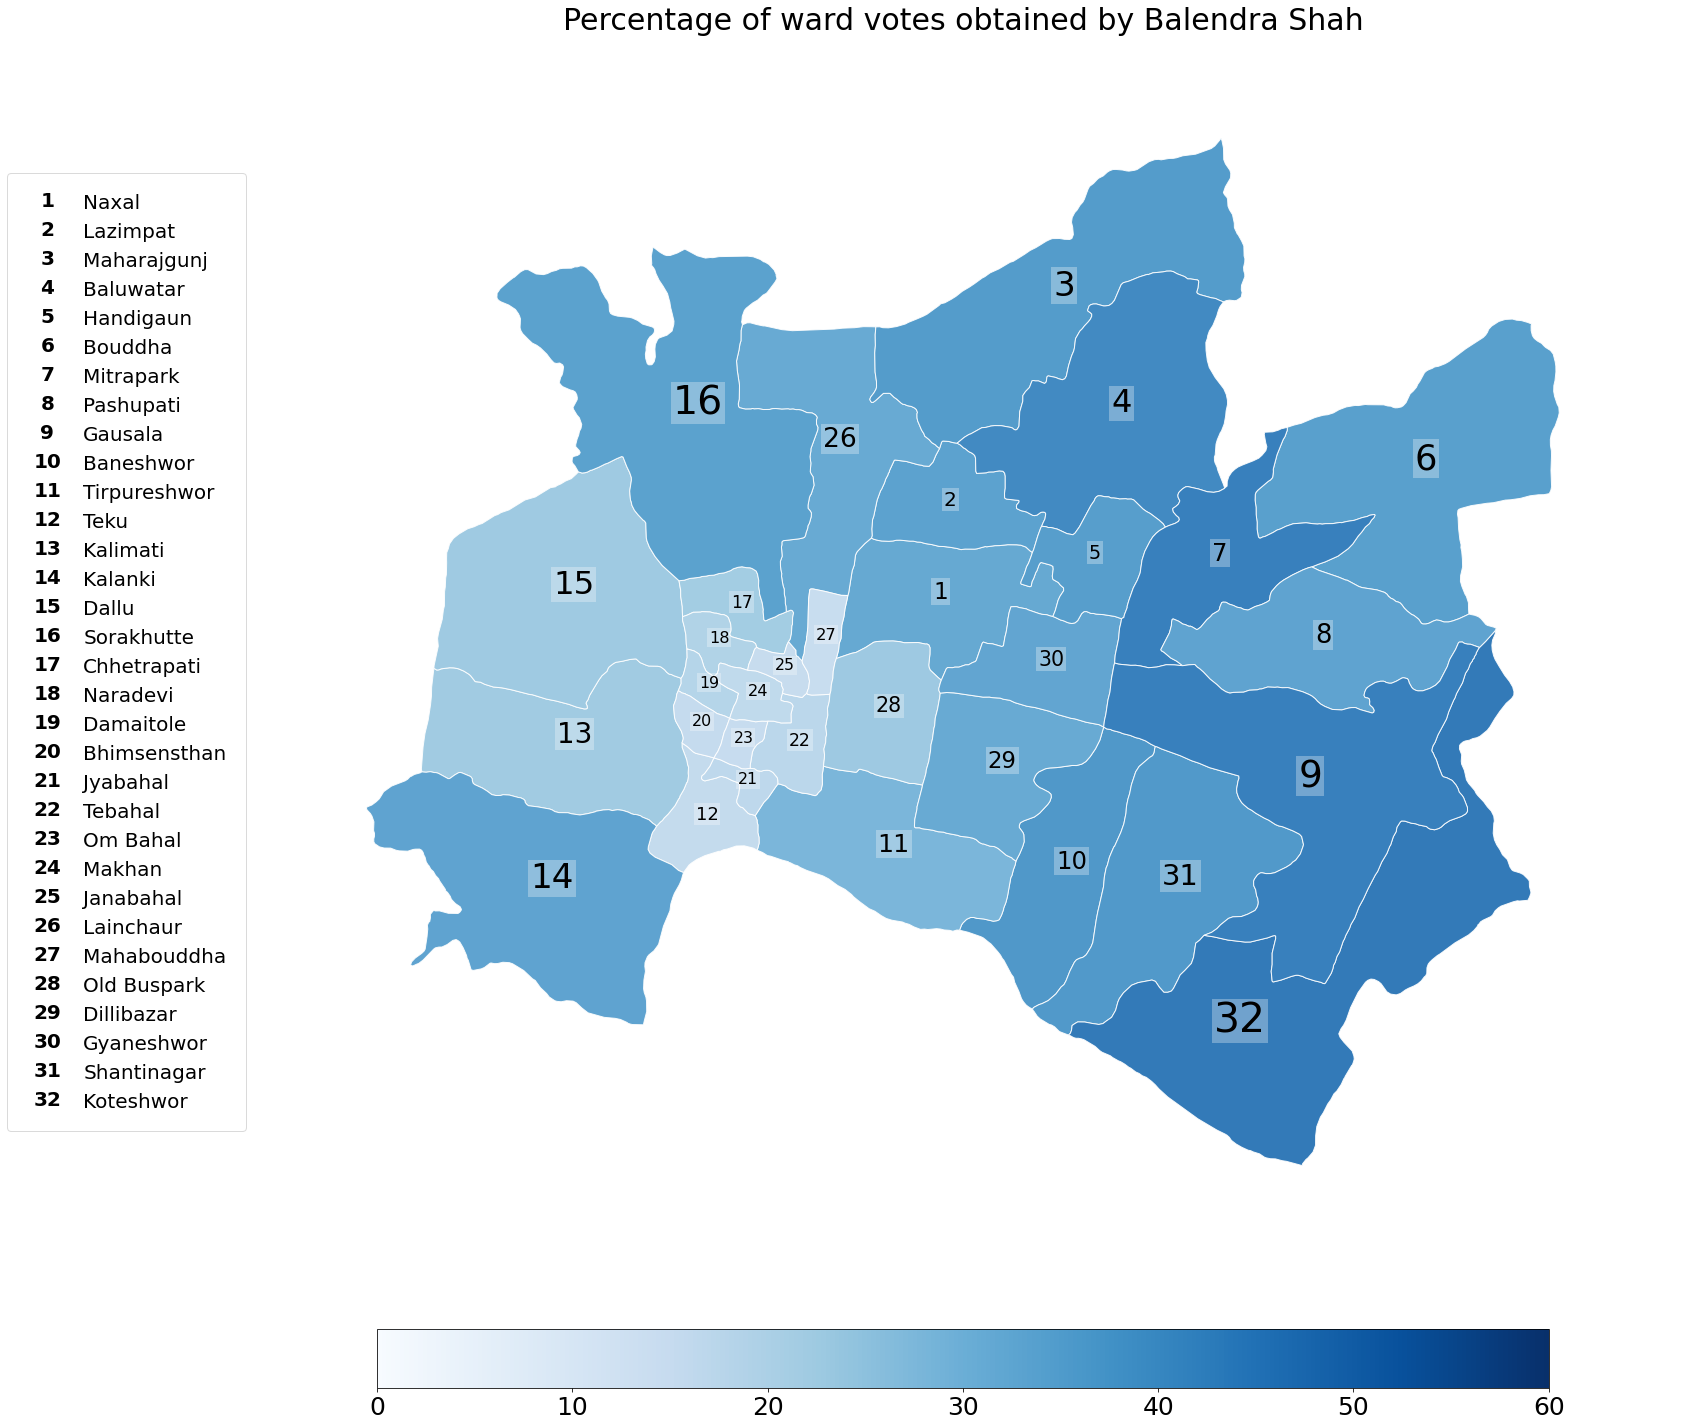

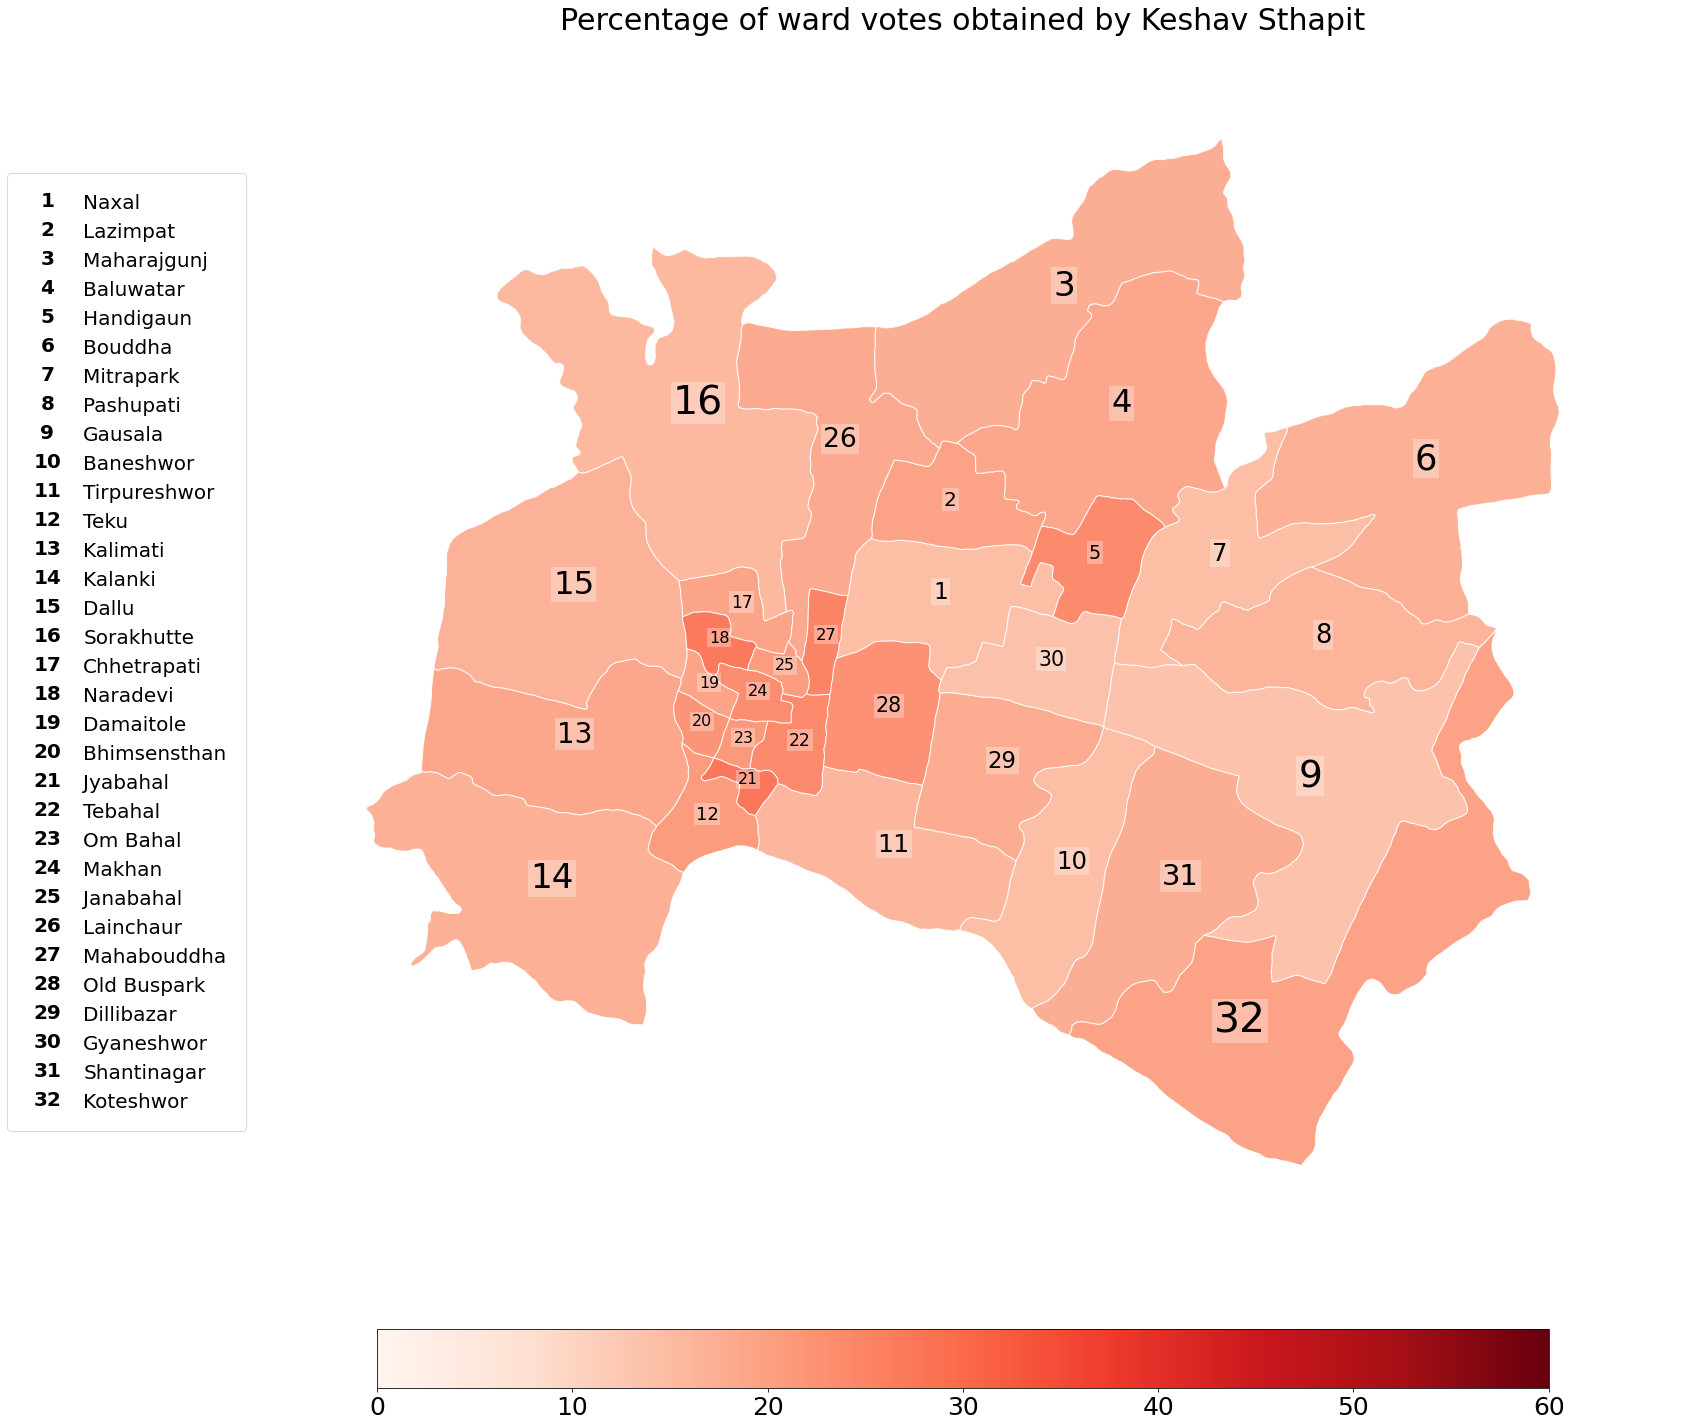

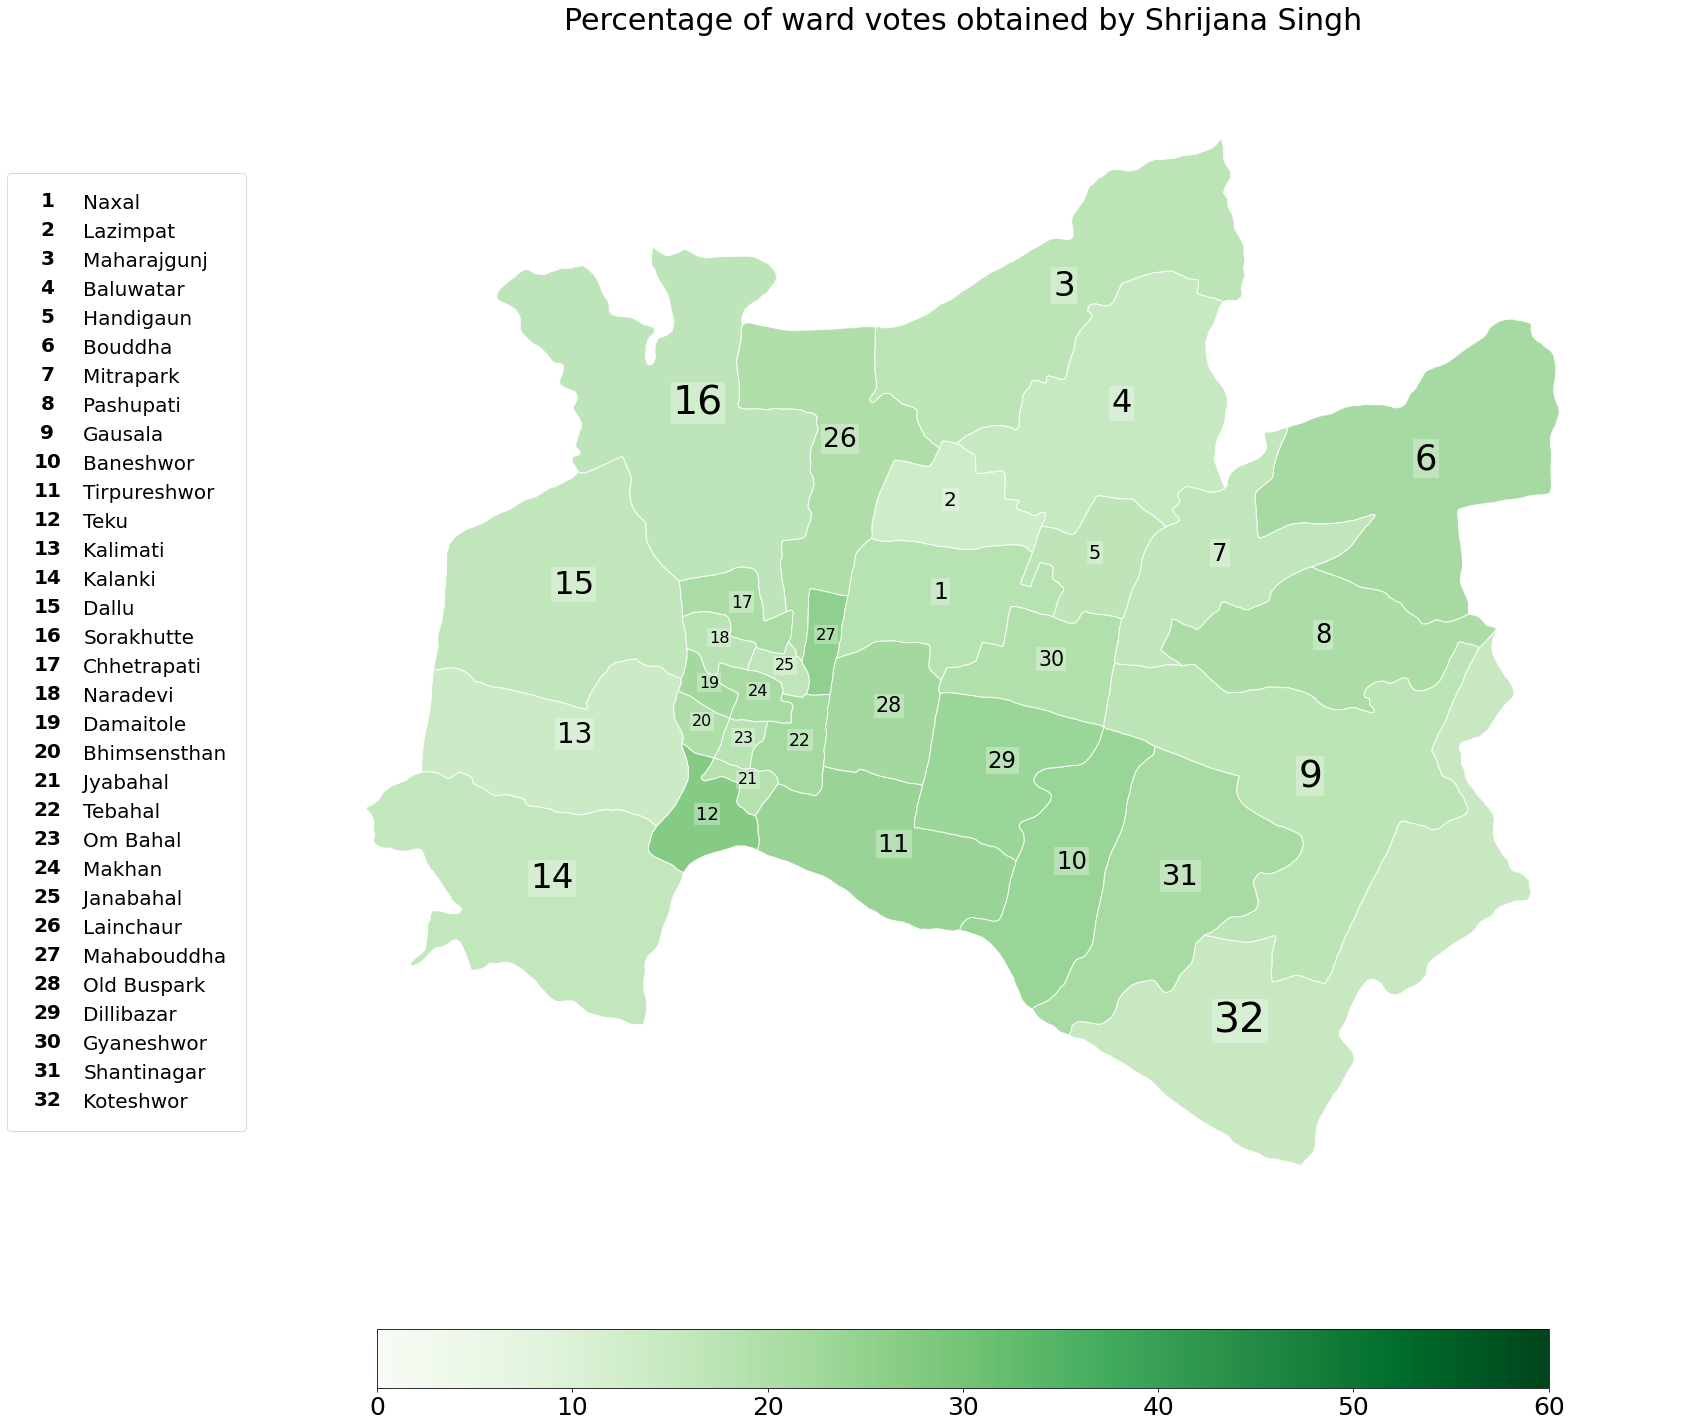

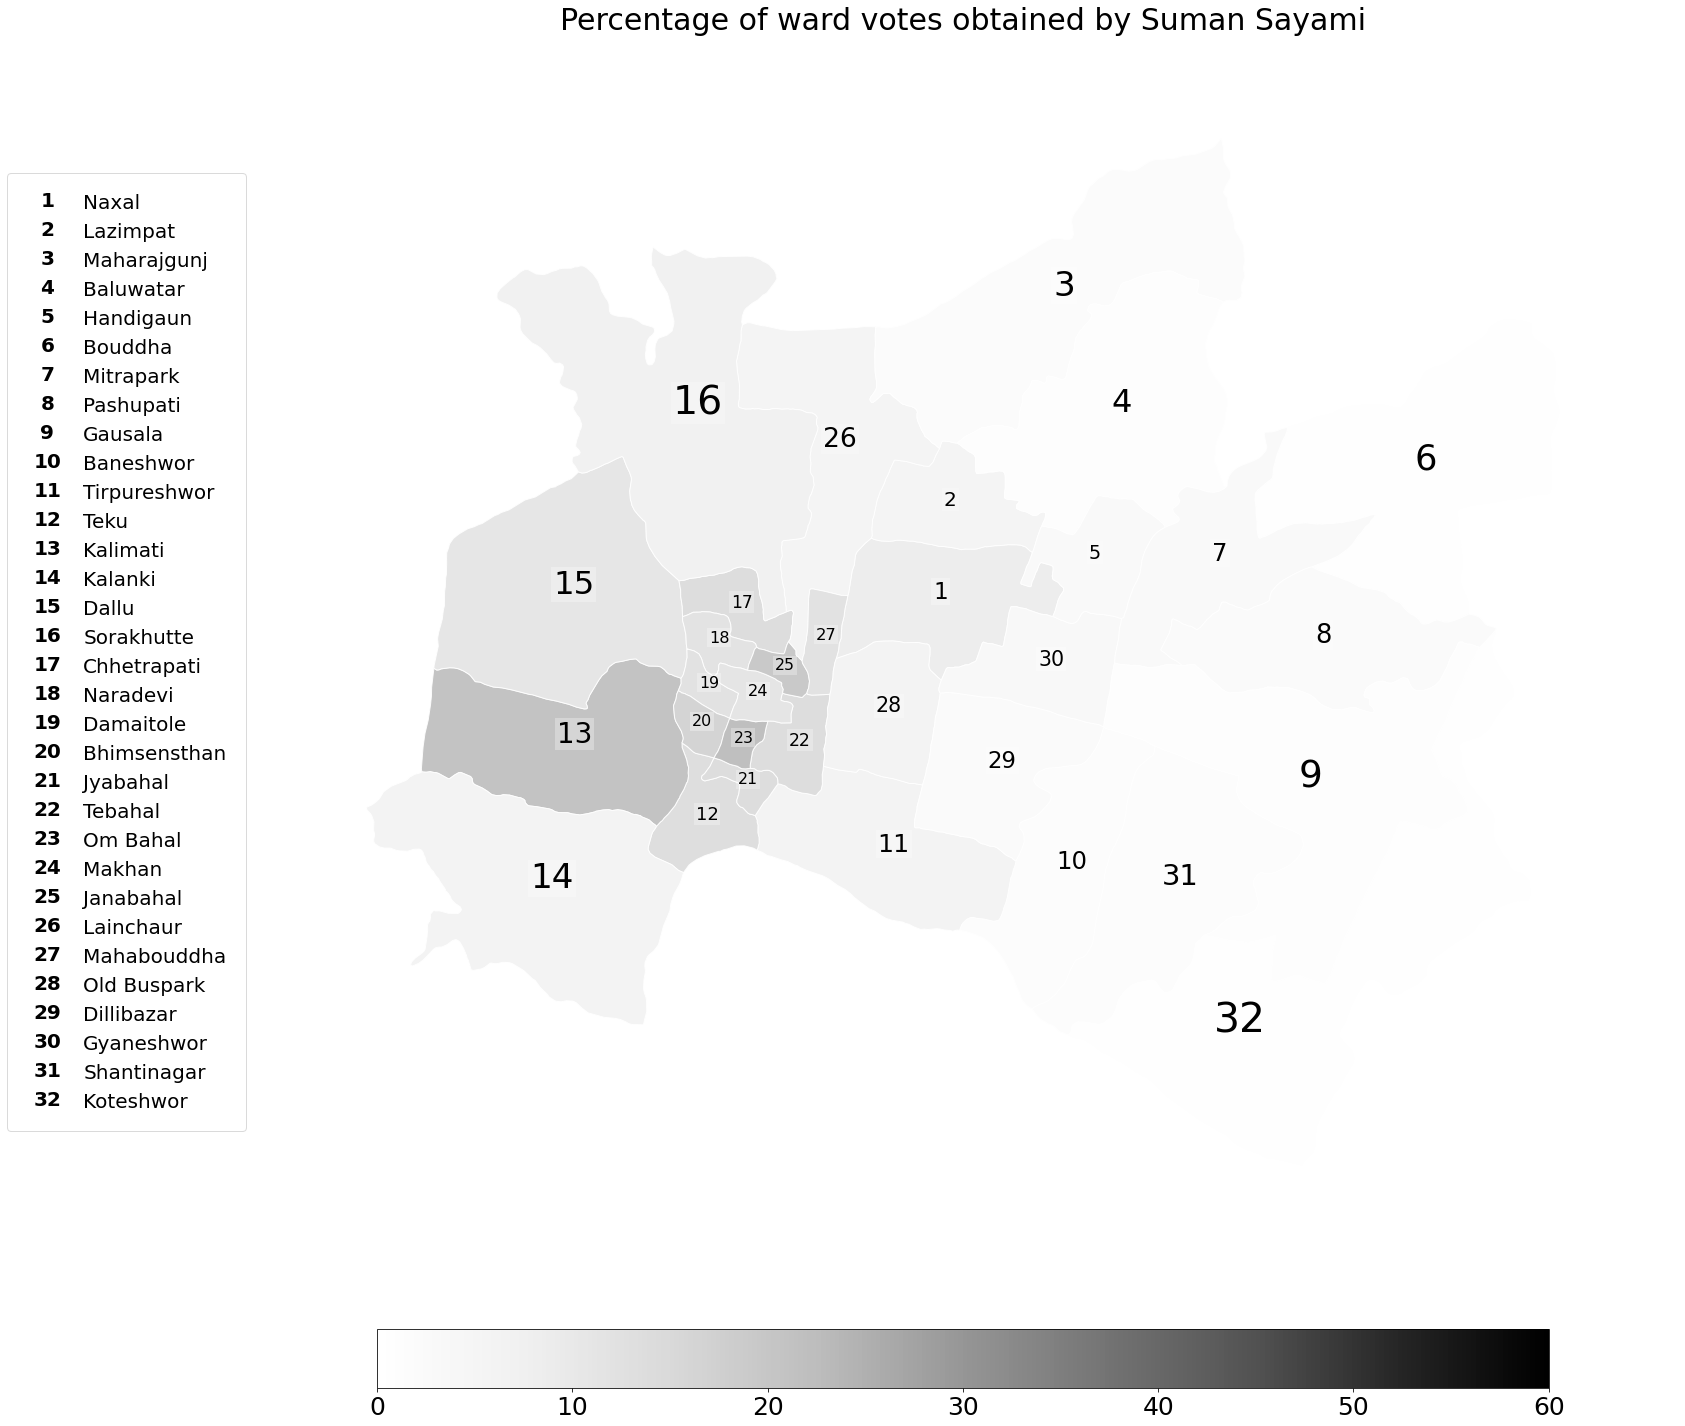

In [134]:
candidates = [('Balendra Shah', 'Blues'),('Keshav Sthapit','Reds'),('Shrijana Singh','Greens'),('Suman Sayami', 'Greys')]
# matplotlib.rcParams.update(_VSCode_defaultMatplotlib_Params)
# proportion maps
for (candidate, pallete) in candidates:
    field = candidate.split()[1] + " %"
    
    #defining a custom color map
    norm = matplotlib.colors.Normalize(vmin=0, vmax=60)
    cmap = matplotlib.cm.ScalarMappable(norm=norm, cmap=pallete).cmap
    
    axis = gplt.choropleth(
        wards_data_ktm, 
        hue=field,
        alpha = 0.9, 
        cmap=cmap,
        norm=norm,
        legend=True,
        edgecolor='white',
        figsize=(30,28),
        legend_kwargs={'orientation': 'horizontal','pad':0.04,'shrink':0.7},
        )
    axis.get_figure().get_axes()[1].tick_params(labelsize=25)
    
    ward_area_list = sorted({ward: area for ward, area in zip(wards_data_ktm.WARD, wards_data_ktm.Area)}.items())
    sorted_ward_list = [Text(text=str(ward)) for (ward, _) in ward_area_list]
    sorted_area_list = [area for (_,area) in ward_area_list]

    plt.legend(
        handles = sorted_ward_list,
        labels = sorted_area_list,
        fontsize = 20,
        fancybox = True, 
        framealpha = 0.7,
        loc='center left',
        borderpad=1,
        borderaxespad=-12
    )

    for geometry, label, name in zip(wards_data_ktm.geometry, wards_data_ktm.WARD, wards_data_ktm.Area):
        xycoords = (geometry.centroid.coords[0][0]-0.0006,geometry.centroid.coords[0][1]) if label != 32 else (geometry.centroid.coords[0][0]-0.0084,geometry.centroid.coords[0][1]-0.005)
        axis.annotate(
            text=label, 
            xy=xycoords, 
            ha='left',
            fontstretch='ultra-expanded', 
            fontsize = 15+ 0.7*(geometry.area / wards_data_ktm.geometry.area.min()), 
            bbox={'facecolor': 'white', 'alpha':0.3, 'pad': 2, 'edgecolor':'none'},
            label=name
            )
        plt.title("Percentage of ward votes obtained by "+candidate, fontsize=30)
    
    plt.savefig('../visualizations/'+candidate + " Proportion of votes in Kathmandu.jpg")

In [84]:
# # proportion maps
# for candidate in candidates:
#     field = candidate.split()[1] + " Proportion"
#     axis = gplt.choropleth(
#         wards_data_ktm, 
#         hue=field,
#         alpha = 0.85, 
#         cmap='BuGn',
#         legend=True,
#         edgecolor='white',
#         figsize=(30,30)
#         )
    
#     # changing the legend font size
#     legend_axis = axis.figure.axes[1]
#     legend_axis.tick_params(labelsize=30)

#     for geometry, label in zip(wards_data_ktm.geometry, wards_data_ktm.WARD):
#         xycoords = (geometry.centroid.coords[0][0]-0.0006,geometry.centroid.coords[0][1]) if label != 32 else (geometry.centroid.coords[0][0]-0.0064,geometry.centroid.coords[0][1]-0.01)
#         axis.annotate(
#             text=label, 
#             xy=xycoords, 
#             ha='left',
#             fontstretch='ultra-expanded', 
#             fontsize = 10+ ( geometry.area / wards_data_ktm.geometry.area.min()), 
#             bbox={'facecolor': 'white', 'alpha':0.3, 'pad': 2, 'edgecolor':'none'}
#             )
#         plt.title("Proportion of ward votes obtained by "+ candidate, fontsize=30)
#     plt.savefig('../visualizations/'+candidate + " Proportion of votes in Kathmandu.svg")

In [85]:
wards_data_ktm['winner'] = wards_data_ktm[[candidate[0] for candidate in candidates]].idxmax(axis=1)
wards_data_ktm[:2]

,PROVINCE,DISTRICT,PALIKA,TYPE,WARD,geometry,Ward,Area,Total Votes,Balendra Shah,...,Invalid votes,Shah Proportion,Singh Proportion,Sthapit Proportion,Sayami Proportion,Shah %,Singh %,Sthapit %,Sayami %,winner
0,3,KATHMANDU,Kathmandu,Mahanagarpalika,1,"POLYGON ((85.33272 27.71672, 85.33262 27.71641...",1,Naxal,2318,783,...,335,0.337791,0.194996,0.157463,0.090595,33.77912,19.499569,15.746333,9.059534,Balendra Shah
1,3,KATHMANDU,Kathmandu,Mahanagarpalika,10,"POLYGON ((85.34256 27.70121, 85.34249 27.70102...",10,Baneshwor,7090,2733,...,1061,0.385472,0.253597,0.157264,0.016361,38.54725,25.359662,15.726375,1.636107,Balendra Shah


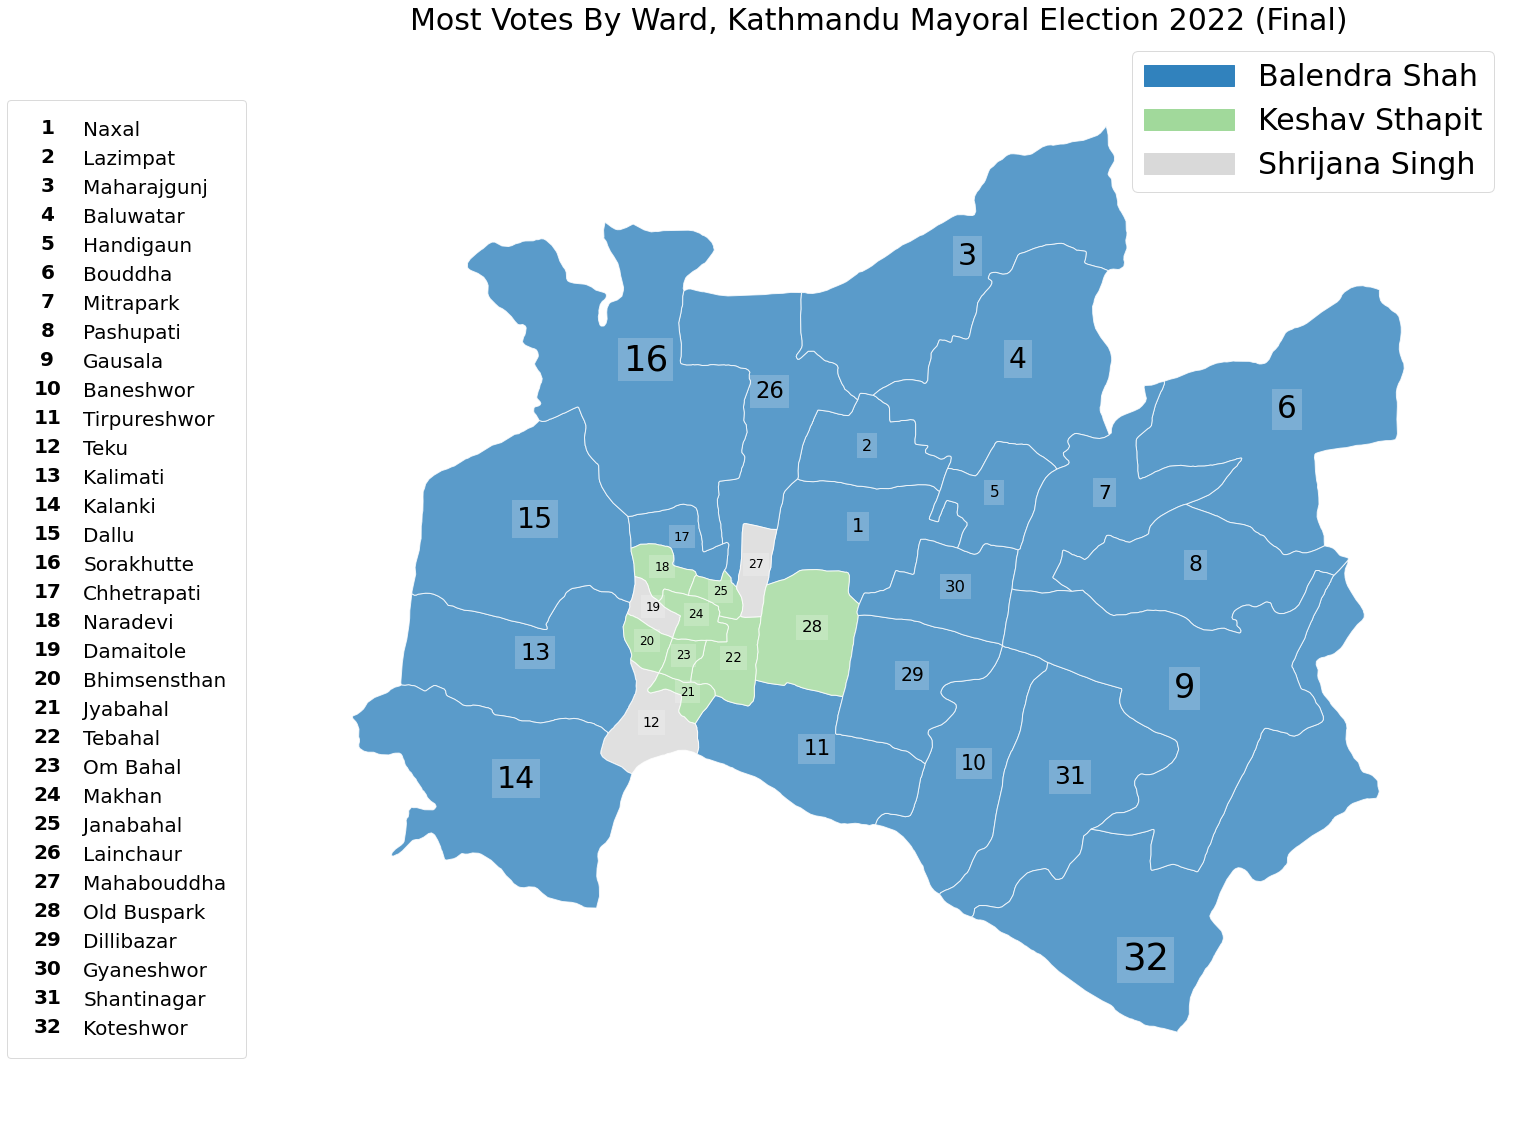

In [138]:
field = 'winner'

axis = gplt.choropleth(
    wards_data_ktm, 
    hue=field,
    cmap='tab20c',
    alpha = 0.8, 
    edgecolor='white',
    figsize=(30,20)
    )

winners = np.sort(wards_data_ktm['winner'].unique())
colors = cm.get_cmap('tab20c')(np.linspace(0, 1, len(winners)))

color_candidate_legend = plt.legend(
    handles=[mpatches.Patch(color=color, label=winner) for winner, color in zip(winners, colors)], 
    fontsize=30, 
    fancybox=True,
    framealpha=0.7,
    handlelength=3,
    markerscale=3,
    frameon=True
    )

ward_area_list = sorted({ward: area for ward, area in zip(wards_data_ktm.WARD, wards_data_ktm.Area)}.items())
sorted_ward_list = [Text(text=str(ward)) for (ward, _) in ward_area_list]
sorted_area_list = [area for (_,area) in ward_area_list]

plt.legend(
    handles = sorted_ward_list,
    labels = sorted_area_list,
    fontsize = 20,
    fancybox = True, 
    framealpha = 0.7,
    loc='center left',
    borderpad=1,
    borderaxespad=-12
)
plt.gca().add_artist(color_candidate_legend)

for geometry, label in zip(wards_data_ktm.geometry, wards_data_ktm.WARD):
    xycoords = (geometry.centroid.coords[0][0]-0.0006,geometry.centroid.coords[0][1]) if label != 32 else (geometry.centroid.coords[0][0]-0.0064,geometry.centroid.coords[0][1]-0.01)
    axis.annotate(
        text=label, 
        xy=xycoords,
        ha='left',
        fontstretch='ultra-expanded', 
        fontsize = 11+0.7*(geometry.area / wards_data_ktm.geometry.area.min()), 
        bbox={'facecolor': 'white', 'alpha':0.2, 'pad': 5, 'edgecolor':'none'}
        )
    plt.title("Most Votes By Ward, Kathmandu Mayoral Election 2022 (Final)", fontsize=30)
plt.savefig('../visualizations/most votes Kathmandu.jpg')

In [87]:
wards_data_ktm.explore(
    column='Shah %',
    tooltip=['Area', 'Sthapit %', 'Keshav Sthapit' ,'winner'],
    popup=True,
    legend=True,
    tiles="CartoDB positron",
    cmap='Reds',
    style_kwds=dict(color="white")
)